Video presentation: https://youtu.be/e3_wRIZfJew

Kaggle dataset: https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data?resource=download

Importing all the necessary libraries and tools

In [157]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


Importing dataset to df variable

In [158]:
df = pd.read_csv("Credit_Card_Customer_Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


Dopping unnecessary features

In [159]:
df.drop(['Sl_No', 'Customer Key'], axis='columns', inplace=True)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


ELBOW METHOD to determine the optimal value for k

In [160]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])
    sse.append(km.inertia_)

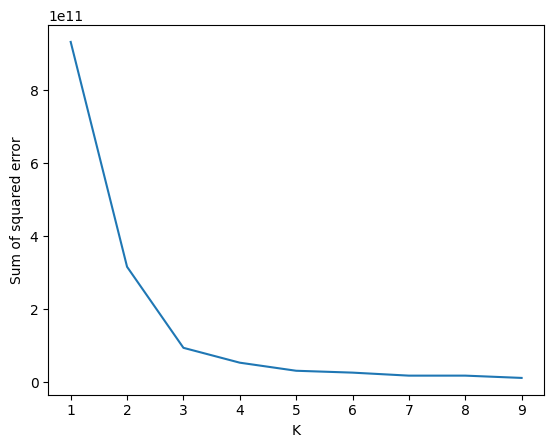

In [161]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Optimal value seems to be somewhere between 3 and 5. Let's train here with k=3. Training with 4 and 5 in other files.

In [162]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Adding cluster values to dataframe

In [163]:
df['cluster']=yp
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,100000,2,1,1,0,2
1,50000,3,0,10,9,2
2,50000,7,1,3,4,2
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


DATA VISUALISATION

In [164]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

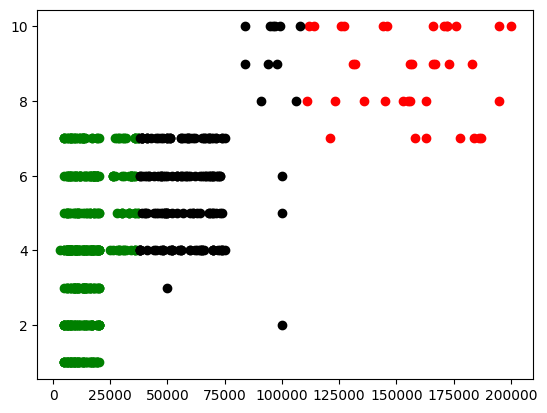

In [165]:
plt.scatter(df1['Avg_Credit_Limit'],df1['Total_Credit_Cards'],color='green')
plt.scatter(df2['Avg_Credit_Limit'],df2['Total_Credit_Cards'],color='red')
plt.scatter(df3['Avg_Credit_Limit'],df3['Total_Credit_Cards'],color='black')

The larger credit limit customers have, the more they have credit cards

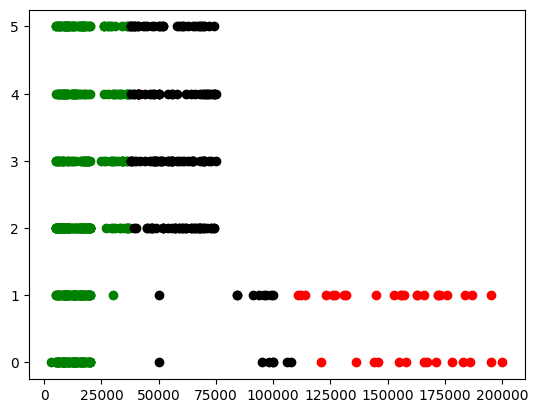

In [166]:
plt.scatter(df1['Avg_Credit_Limit'],df1['Total_visits_bank'],color='green')
plt.scatter(df2['Avg_Credit_Limit'],df2['Total_visits_bank'],color='red')
plt.scatter(df3['Avg_Credit_Limit'],df3['Total_visits_bank'],color='black')



The larger credit limit customers have, the less they visit the bank

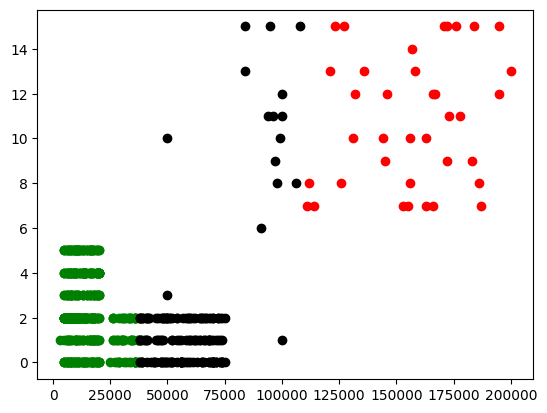

In [167]:
plt.scatter(df1['Avg_Credit_Limit'],df1['Total_visits_online'],color='green')
plt.scatter(df2['Avg_Credit_Limit'],df2['Total_visits_online'],color='red')
plt.scatter(df3['Avg_Credit_Limit'],df3['Total_visits_online'],color='black')



The larger credit limit customers have, the more they visit the bank online

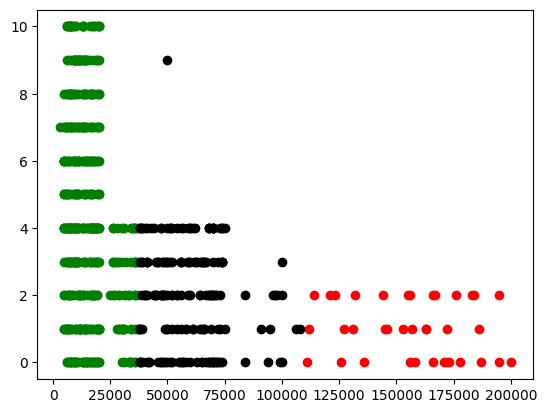

In [168]:
plt.scatter(df1['Avg_Credit_Limit'],df1['Total_calls_made'],color='green')
plt.scatter(df2['Avg_Credit_Limit'],df2['Total_calls_made'],color='red')
plt.scatter(df3['Avg_Credit_Limit'],df3['Total_calls_made'],color='black')



The larger credit limit customers have, the less they call the bank by phone